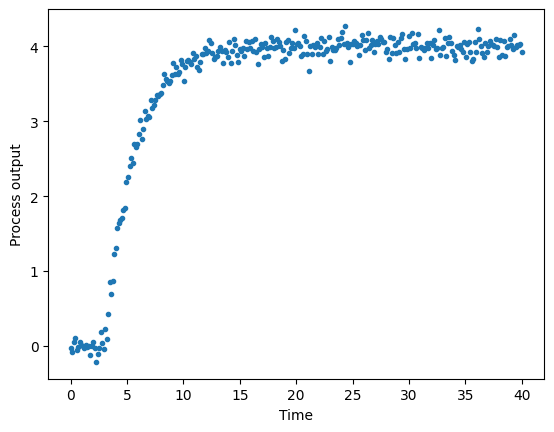

Kp = 4.001101427482028, tau = 2.5398697893484647, theta = 3.0211083123399494


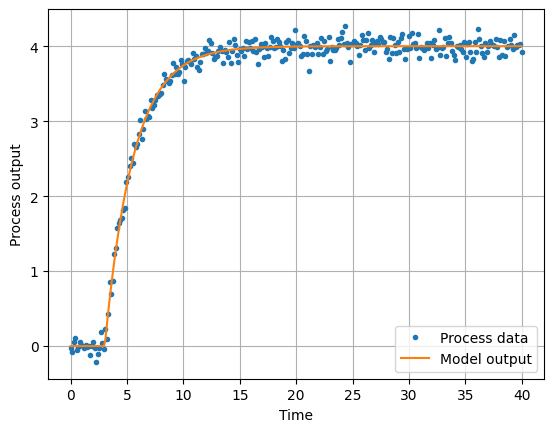

In [ ]:
# Identification of first order transfer function model with time delay from process data
# Seshu Damarla, 28 Nov. 2024
# Reference: Process Control: Modelling, Simulation and Control by B. W. Bequette
# Chemical Process Control An Introduction to Theory and Practice - George Stephanopoulos

""" Identification of first order transfer function model from noisy process data

G = y(s)/u(s) = (Kp / (tau * s + 1)) * e(-s*Θ)

y(s) - process output, u(s) - input
Kp - process gain, tau - time constant, Θ - time delay """

!pip install control
import numpy as np
import matplotlib.pyplot as plt
import control
from scipy.optimize import minimize
from scipy.optimize import curve_fit

# define response of first order transfer function with time delay to a step change in input
def first_order_tf_with_delay(t,Kp,tau,theta):
    A = 1 # magnitude of step change in input
    ymodel = np.zeros_like(t)
    for i,time in enumerate(t):
        if time >= theta:
            ymodel[i] = A*Kp*(1-np.exp(-(time-theta)/tau))
    return ymodel

# generate process data
t = np.linspace(0,40,300)
A = 1 # magnitude of step change in input
Kp_true, tau_true, theta_true = 4, 2.5,3
process_data = first_order_tf_with_delay(t,Kp_true,tau_true,theta_true)
process_data += np.random.normal(0,0.1,len(t))

plt.plot(t,process_data,'o',markersize = 3)
plt.xlabel('Time')
plt.ylabel('Process output')
plt.show()

# Identify the FOPTD model from the process data
initial_guess = [1,1,1]
params, params_covariance = curve_fit(first_order_tf_with_delay,t,process_data,p0= initial_guess)
Kp_fit, tau_fit, theta_fit = params
print(f'Kp = {Kp_fit}, tau = {tau_fit}, theta = {theta_fit}')

# generate response of the process model
ymodel = first_order_tf_with_delay(t,Kp_fit,tau_fit,theta_fit)

# compare process data with model output
plt.plot(t,process_data,'o',markersize = 3,label = 'Process data')
plt.plot(t,ymodel,label = 'Model output')
plt.xlabel('Time')
plt.ylabel('Process output')
plt.legend()
plt.grid()
plt.show()